# Importando as Bibliotecas Necessárias

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

# Questão 1:
# Juntando as Imagens Horizontalmente

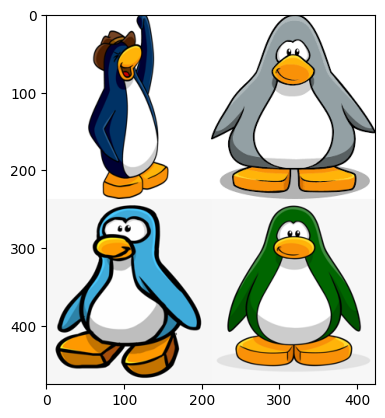

In [77]:
# Função para que a imagem tenha 3 canais
def convert_to_rgb(image):
    if image.mode != 'RGB':
        return image.convert('RGB')
    return image

# Carregando imagens
img1 = Image.open('./img/P1.png')
img2 = Image.open('./img/P2.png')
img3 = Image.open('./img/P3.jpg')
img4 = Image.open('./img/P4.png')

# Convertendo imagens para RGB
img1 = convert_to_rgb(img1)
img2 = convert_to_rgb(img2)
img3 = convert_to_rgb(img3)
img4 = convert_to_rgb(img4)

# Convertendo para arrays
img1_arr = np.array(img1)
img2_arr = np.array(img2)
img3_arr = np.array(img3)
img4_arr = np.array(img4)

# Validando e redimensionando as imagens para que tenham o mesmo tamanho
new_size = (min(img1_arr.shape[1], img2_arr.shape[1], img3_arr.shape[1], img4_arr.shape[1]),
            min(img1_arr.shape[0], img2_arr.shape[0], img3_arr.shape[0], img4_arr.shape[0]))

img1_resized = np.array(img1.resize(new_size))
img2_resized = np.array(img2.resize(new_size))
img3_resized = np.array(img3.resize(new_size))
img4_resized = np.array(img4.resize(new_size))

# Combinando as imagens em duas linhas
top_row = np.hstack((img1_resized, img2_resized))  
bottom_row = np.hstack((img3_resized, img4_resized))  

# Juntando as duas linhas
combined_image = np.vstack((top_row, bottom_row))

# Convertendo de array para imagem
final_image = Image.fromarray(combined_image)

# Exibindo e salvando a imagem combinada
plt.imshow(final_image)

final_image.save('pinguins_juntos.png')

# Questao 2:
# Trocando as cores dos Pinguins

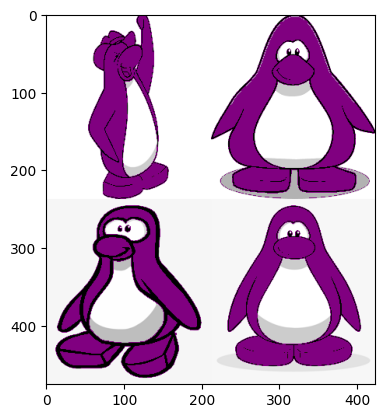

In [ ]:
# Carregando a imagem
img = Image.open('pinguins_juntos.png')

# Convertendo a imagem para array
image = np.array(img)[:, :, :3]

# Fazendo uma máscara para ignorar o fundo branco e ignorar as linhas pretas
# Foram feitos testes para definir o valor mais próximo do ideal
mask = np.all(image > [177, 177, 177], axis=-1)
black_mask = np.all(image < [30, 30, 30], axis=-1)

# Aplicando uma nova cor nos pinguins
new_color = [128, 0, 128]  # roxo
image_recolored = image.copy()
image_recolored[~mask & ~black_mask] = new_color

# Convertendo de array para imagem
image_recolored = Image.fromarray(image_recolored)

# Exibindo e salvando a imagem colorida
plt.imshow(image_recolored)

image_recolored.save('imagem_recolorida.png')

# Questão 3:
# Aplicando o espelhamento

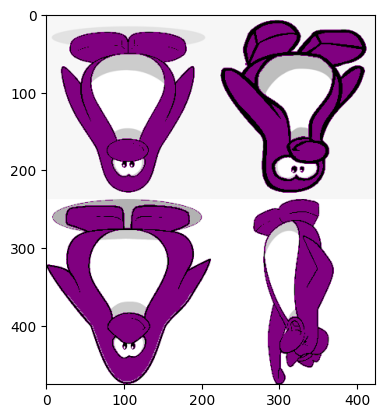

In [79]:
# Carregando a imagem
img = Image.open('imagem_recolorida.png')

# Convertendo a imagem para array
image = np.array(img)[:, :, :3]

# Espelhando em X e Y
img_refl = np.zeros(shape=image.shape, dtype=np.uint8)
img_refl[::-1, ::-1] = image

# Convertendo de array para imagem
img_refl = Image.fromarray(img_refl)

# Exibindo e salvando a imagem espelhada
plt.imshow(img_refl)

img_refl.save('imagem_espelhada.png')

# questão 4:
# Recortando o pinguim escolhido

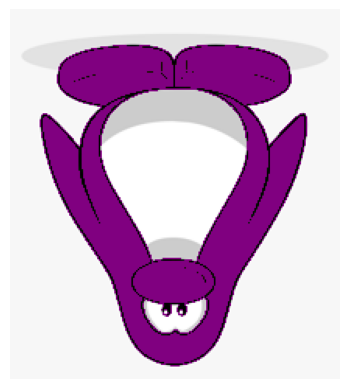

In [80]:
# Carregando a imagem
img = Image.open('imagem_espelhada.png')

# Convertendo a imagem para array
image = np.array(img)

# Definindo as dimensões da imagem
height, width, _ = image.shape

# Dividindo a imagem em 4 quadrantes
half_height = height // 2
half_width = width // 2

# Definindo as coordenadas do segundo quadrante (pinguim escolhido)
second_quadrant = image[0:half_height, 0:half_width]

# Convertendo o quadrante em uma imagem
second_quadrant_img = Image.fromarray(second_quadrant)

# Exibindo e salvando a imagem do pinguim escolhido
plt.imshow(second_quadrant_img)
plt.axis('off')  # Remove os eixos para exibição
plt.show()

second_quadrant_img.save('pinguim_segundo_quadrante.png')

# Questão 5:
# Criando o histograma do pinguim favorito 

Valor do threshold escolhido: 128
Justificativa:
Um threshold de 128 é escolhido porque é o ponto médio da escala de cinza (0-255).
Esse valor pode ajudar a separar os pinguins do fundo, assumindo que eles estão mais escuros em comparação com o fundo.
Ao aplicar esse threshold, pixels com intensidade abaixo de 128 serão considerados como parte do pinguim (ou como objeto),
enquanto pixels com intensidade acima serão considerados como fundo.


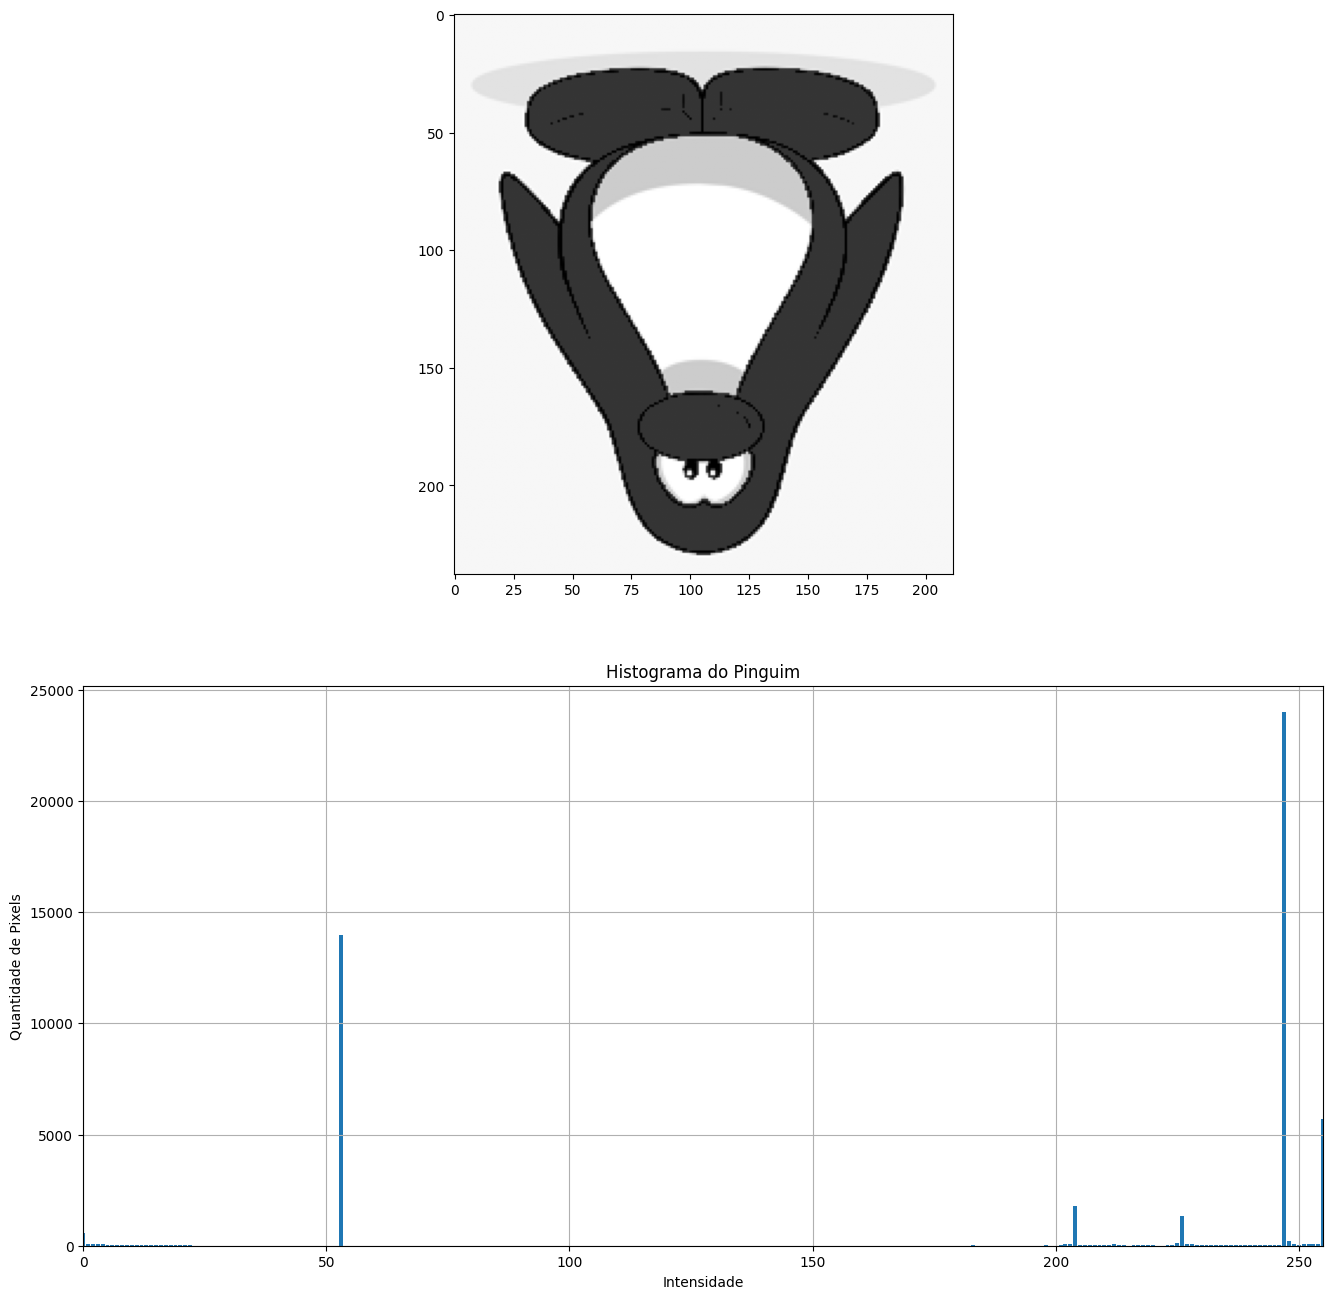

In [81]:
# Funções para calcular e mostrar o histograma
def histogram_gray(img):
    (l, c) = img.shape
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            intensity = img[i, j]
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)
    plt.title('Histograma do Pinguim')
    plt.xlabel('Intensidade')
    plt.ylabel('Quantidade de Pixels')
    plt.xlim(0, 255)
    plt.grid()

pin_image = Image.open('pinguim_segundo_quadrante.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

show_histogram_gray(img)

threshold = 128  # Este é um valor comum para a separação entre fundo e objeto em imagens de escala de cinza.

print(f'Valor do threshold escolhido: {threshold}')
print('Justificativa:')
print('Um threshold de 128 é escolhido porque é o ponto médio da escala de cinza (0-255).')
print('Esse valor pode ajudar a separar os pinguins do fundo, assumindo que eles estão mais escuros em comparação com o fundo.')
print('Ao aplicar esse threshold, pixels com intensidade abaixo de 128 serão considerados como parte do pinguim (ou como objeto),')
print('enquanto pixels com intensidade acima serão considerados como fundo.')


# Questao 6:
# Convertendo para que todos os pixeis abaixo dele sejam pintados de outra cor

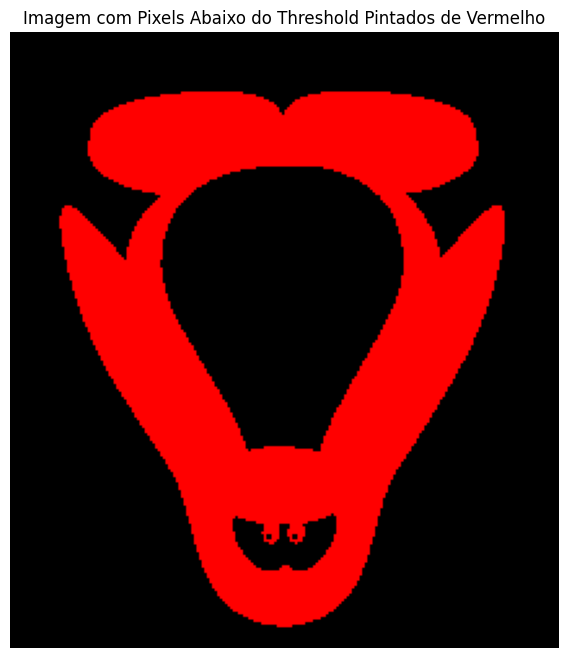

In [82]:
pin_image = Image.open('pinguim_segundo_quadrante.png') 
img = np.array(pin_image.convert('L'))  # Converter para escala de cinza

threshold = 128  # Valor de threshold

# Criar uma nova imagem colorida com a cor favorita (azul)
color_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

# Pintar os pixels abaixo do threshold com a cor azul
vermelho_color = [255, 0, 0]  # Azul em formato RGB
color_image[img < threshold] = vermelho_color  # Aplica a cor azul aos pixels abaixo do threshold

colored_image = Image.fromarray(color_image)

plt.figure(figsize=(8, 8))
plt.imshow(colored_image)
plt.axis('off')  # Remove os eixos
plt.title('Imagem com Pixels Abaixo do Threshold Pintados de Vermelho')
plt.show()

colored_image.save('pinguim_colorido.png')